# Particle Statistics
#### (up to 10 events, from 0 to 9)

In [1]:
# Import the libraries 
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
sns.set(context="notebook", font='serif', palette='Set1')

In [3]:
# Generate a Dataframe with the particle information.

particles = pd.DataFrame()

# Iterate a loop to obtain all the information and append it into the 
# dataframe

for i in range(10):
    if i<10:
        particle = pd.read_csv(f'./train_1/train_1/event00000100{int(i)}-particles.csv')
    else:
        particle = pd.read_csv(f'./train_1/train_1/event0000010{int(i)}-particles.csv')
    particle['event'] = [i for j in range(particle.shape[0])]
    particles = particles.append(particle)
    
particles.reset_index()
particles.head(2)

,particle_id,vx,vy,vz,px,py,pz,q,nhits,event
0,4503668346847232,-0.009288,0.009861,-0.077879,-0.055269,0.323272,-0.203492,-1,8,0
1,4503737066323968,-0.009288,0.009861,-0.077879,-0.948125,0.470892,2.010060,1,11,0


In [4]:
hits = pd.DataFrame()
cells = pd.DataFrame()
truths = pd.DataFrame()

# Iterate a loop to obtain all the information and append it into the other
# dataframe

for i in range(10):
    if i<10:
        hit = pd.read_csv(f'./train_1/train_1/event00000100{int(i)}-hits.csv')
        truth = pd.read_csv(f'./train_1/train_1/event00000100{int(i)}-truth.csv')

    else:
        hit = pd.read_csv(f'./train_1/train_1/event0000010{int(i)}-hits.csv')
        truth = pd.read_csv(f'./train_1/train_1/event0000010{int(i)}-truth.csv')
    hit['event'] = [i for j in range(hit.shape[0])]
    
    hits = hits.append(hit)
    truths = truths.append(truth)

    
general_particle_info = pd.concat([hits, truths], axis=1).reset_index()
general_particle_info.drop_duplicates()
general_particle_info.head()

,index,hit_id,x,y,z,volume_id,layer_id,module_id,event,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,0,1,-64.4099,-7.163700,-1502.5,7,2,1,0,1,0,-64.4116,-7.164120,-1502.5,250710.000000,-149908.000000,-956385.00000,0.000000
1,1,2,-55.3361,0.635342,-1502.5,7,2,1,0,2,22525763437723648,-55.3385,0.630805,-1502.5,-0.570605,0.028390,-15.49220,0.000010
2,2,3,-83.8305,-1.143010,-1502.5,7,2,1,0,3,0,-83.8280,-1.145580,-1502.5,626295.000000,-169767.000000,-760877.00000,0.000000
3,3,4,-96.1091,-8.241030,-1502.5,7,2,1,0,4,297237712845406208,-96.1229,-8.230360,-1502.5,-0.225235,-0.050968,-3.70232,0.000008
4,4,5,-62.6736,-9.371200,-1502.5,7,2,1,0,5,418835796137607168,-62.6594,-9.375040,-1502.5,-0.281806,-0.023487,-6.57318,0.000009


In [5]:
# Once both of the Dataframes are done, we can start 
# the statistical analysis.

## Variable distributions

It is possible to analyze the distribution of each variable to fully understand the behaviour.

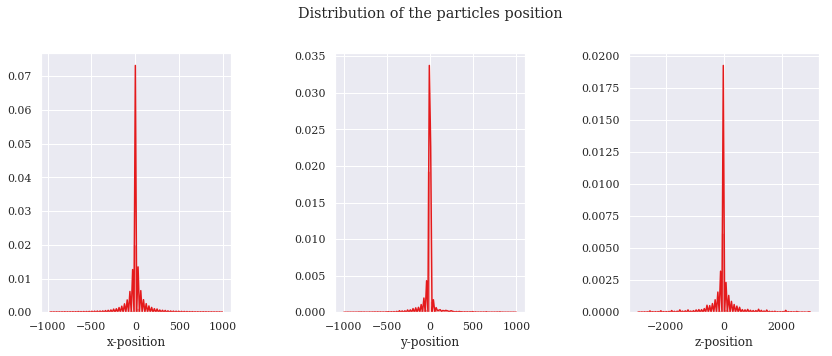

In [6]:
# Particles initial position
plt.figure(figsize=(12,8))
plt.suptitle('Distribution of the particles position')

plt.subplot(131)
sns.distplot(particles.vx)
plt.xlabel('x-position')

plt.subplot(132)
sns.distplot(particles.vy)
plt.xlabel('y-position')

plt.subplot(133)
sns.distplot(particles.vz)
plt.xlabel('z-position')

#Adjustment of parameters
plt.subplots_adjust(top=0.90, bottom=0.45, left=0.05, right=0.95, hspace=0.25, wspace=0.55)
plt.show()

It is easy to determine that most of the particles are in the center of the chamber in the 3 available dimensions.

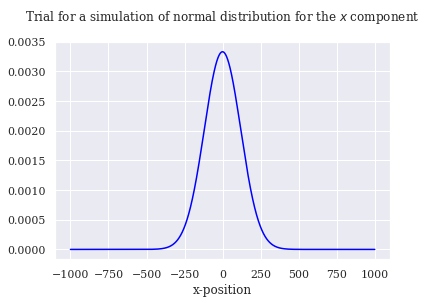

In [7]:
# We can try to develop a distribution model to simulate the process with the mean and the standard deviation
x = np.linspace(-1000,1000,1000000)
y = ss.norm.pdf(x, particles.vx.mean(),particles.vx.std())
plt.plot(x,y, c='b')
plt.title('Trial for a simulation of normal distribution for the $x$ component\n')
plt.xlabel('x-position')
plt.show()

We conclude that a normal distribution is not representative of the actual values

In [8]:
# However, with the actual values we can compute the probability of being in the center position.
# We will state that the center position is located in the mean +/- one standard deviation.

# Probability for x:
mux = particles.vx.mean()
stdx =particles.vx.std()
condition_truex = sum(np.where((particles.vx < mux+stdx) & (particles.vx > mux-stdx),1,0))
prob_x = condition_truex/particles.shape[0]

# Probability for y:
muy = particles.vy.mean()
stdy =particles.vy.std()
condition_truey = sum(np.where((particles.vy < muy+stdy) & (particles.vy > muy-stdy),1,0))
prob_y = condition_truey/particles.shape[0]

# Probability for z:
muz = particles.vz.mean()
stdz =particles.vz.std()
condition_truez = sum(np.where((particles.vz < muz+stdz) & (particles.vz > muz-stdz),1,0))
prob_z = condition_truez/particles.shape[0]

print(f'The probability of being located at the center for the x value is: {round(prob_x,7)*100}%')
print(f'The probability of being located at the center for the y value is: {round(prob_y,7)*100}%')
print(f'The probability of being located at the center for the z value is: {round(prob_z,6)*100}%')

The probability of being located at the center for the x value is: 89.98612%
The probability of being located at the center for the y value is: 89.95451%
The probability of being located at the center for the z value is: 86.7325%


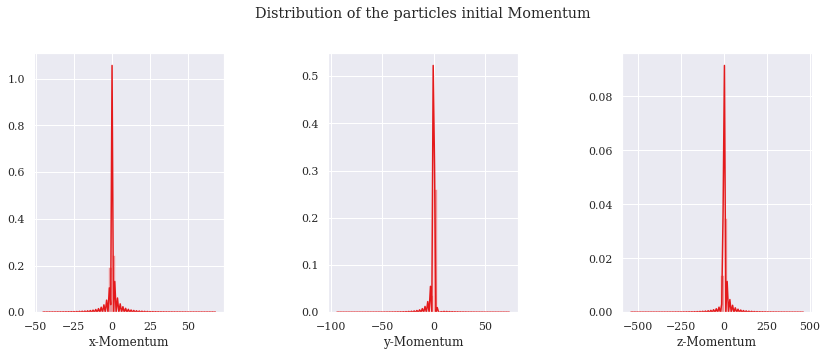

In [9]:
# We can do the same that was done for the positions, but with the momentums:

# Particles initial momentum
plt.figure(figsize=(12,8))
plt.suptitle('Distribution of the particles initial Momentum')

plt.subplot(131)
sns.distplot(particles.px)
plt.xlabel('x-Momentum')

plt.subplot(132)
sns.distplot(particles.py)
plt.xlabel('y-Momentum')

plt.subplot(133)
sns.distplot(particles.pz)
plt.xlabel('z-Momentum')

#Adjustment of parameters
plt.subplots_adjust(top=0.90, bottom=0.45, left=0.05, right=0.95, hspace=0.25, wspace=0.55)
plt.show()

In [10]:
# Probability for x:
mux = particles.px.mean()
stdx =particles.px.std()
condition_truex = sum(np.where((particles.px < mux+stdx) & (particles.px > mux-stdx),1,0))
prob_x = condition_truex/particles.shape[0]

# Probability for y:
muy = particles.py.mean()
stdy =particles.py.std()
condition_truey = sum(np.where((particles.py < muy+stdy) & (particles.py > muy-stdy),1,0))
prob_y = condition_truey/particles.shape[0]

# Probability for z:
muz = particles.pz.mean()
stdz =particles.pz.std()
condition_truez = sum(np.where((particles.pz < muz+stdz) & (particles.pz > muz-stdz),1,0))
prob_z = condition_truez/particles.shape[0]

print(f'The probability of being located at the center for the x momentum value is: {round(prob_x,7)*100}%')
print(f'The probability of being located at the center for the y momentum value is: {round(prob_y,7)*100}%')
print(f'The probability of being located at the center for the z momentum value is: {round(prob_z,6)*100}%')

The probability of being located at the center for the x momentum value is: 90.13542%
The probability of being located at the center for the y momentum value is: 91.8303%
The probability of being located at the center for the z momentum value is: 88.8866%


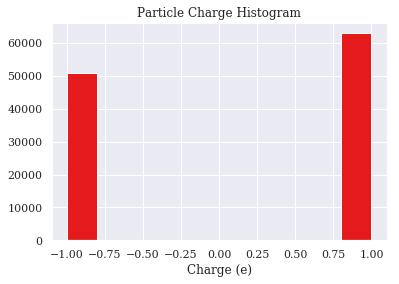

In [11]:
# For the charge of the particles we can obtain a histogram
plt.hist(particles.q)
plt.title('Particle Charge Histogram')
plt.xlabel('Charge (e)')
plt.show()

# This behaviour behaves as a bernoulli distribution.

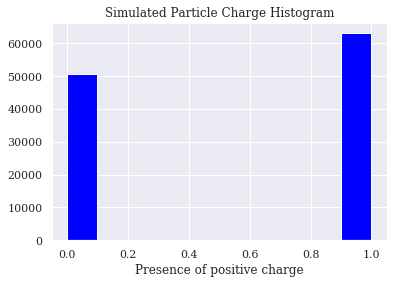

The probability of having a positive charge is approximately:55.28225%
One could expect it to be 50%


In [12]:
# It is possible to simulate a Bernoulli distribution with the given parameters:
no = np.histogram(particles.q)[0][0]
yes = np.histogram(particles.q)[0][-1]

plt.hist(ss.bernoulli.rvs(yes/(yes+no),size=particles.shape[0]), color='blue')
plt.title('Simulated Particle Charge Histogram')
plt.xlabel('Presence of positive charge')
plt.show()

print(f'The probability of having a positive charge is approximately:{round(yes/(yes+no),7)*100}%')
print('One could expect it to be 50%')

In [13]:
# We can generate a bernoulli test to determine it with a 98% of confidence:
ss.binom_test([yes,no], n=particles.shape[0], p=.5)

8.047938795153103e-279

In [14]:
# Since the p-value was smaller than 2% we can say that with 98% of confidence, the probability of 
#having a positive charge is overwhelming 55.28%

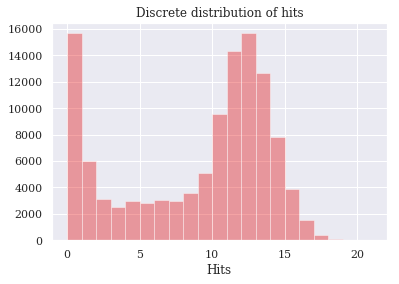

In [15]:
# The values 
sns.distplot(particles.nhits, kde=False, bins=21)
plt.title('Discrete distribution of hits')
plt.xlabel('Hits')
plt.show()

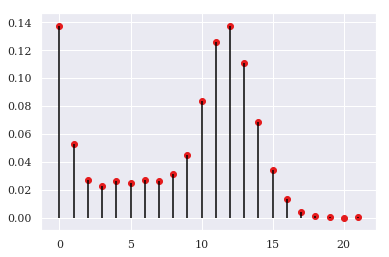

In [16]:
# It is possible to determine the probabilities:
hits_values=particles.nhits.value_counts().sort_index()/particles.shape[0]
plt.vlines(np.arange(0,22),0,hits_values)
plt.scatter(np.arange(0,22),hits_values)

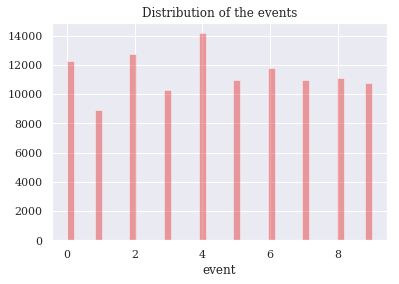

In [17]:
# It is exepcted that the number of particles behaves discretely per event.
sns.distplot(particles.event, kde=False)
plt.title('Distribution of the events')
plt.show()

In [18]:
# Due to the fact that we have 10 different events, we can construct an anova statistic model 
# to see if they were somehow different. The test used is the f test.

vxs = [particles[particles.event==i]['vx'] for i in range(10)]
dif_vx = ss.f_oneway(vxs[0],vxs[1],vxs[2],vxs[3],vxs[4],vxs[5],vxs[6],vxs[7],vxs[8],vxs[9])

vys = [particles[particles.event==i]['vy'] for i in range(10)]
dif_vy = ss.f_oneway(vys[0],vys[1],vys[2],vys[3],vys[4],vys[5],vys[6],vys[7],vys[8],vys[9])

vzs = [particles[particles.event==i]['vz'] for i in range(10)]
dif_vz = ss.f_oneway(vzs[0],vys[1],vzs[2],vzs[3],vzs[4],vzs[5],vzs[6],vzs[7],vzs[8],vzs[9])

letters=['position-x','position-y','position-z']
stat_results = [dif_vx[1], dif_vy[1], dif_vz[1]]

for i in range(len(stat_results)):
    if stat_results[i]<.02:
        print(f'We can say, with a 98% of confidence, that there were significant differences between the events for {letters[i]}.\n p-value = {round(stat_results[i],5)*100}%\n')
    else:
        print(f'We can say, with a 98% of confidence, that there were not significant differences between the events for {letters[i]}.\n p-value = {round(stat_results[i],7)*100}%\n')

We can say, with a 98% of confidence, that there were significant differences between the events for position-x.
 p-value = 0.0%

We can say, with a 98% of confidence, that there were not significant differences between the events for position-y.
 p-value = 14.30294%

We can say, with a 98% of confidence, that there were significant differences between the events for position-z.
 p-value = 0.156%



In [19]:
# In this case, accepting that there is a difference between events for position-x and for position-z might be an error 
# of type 1. This is due to the fact that no variable was changed between events.

In [20]:
# We can do the same for the momentum

pxs = [particles[particles.event==i]['px'] for i in range(10)]
dif_px = ss.f_oneway(pxs[0],pxs[1],pxs[2],pxs[3],pxs[4],pxs[5],pxs[6],pxs[7],pxs[8],pxs[9])

pys = [particles[particles.event==i]['py'] for i in range(10)]
dif_py = ss.f_oneway(pys[0],pys[1],pys[2],pys[3],pys[4],pys[5],pys[6],pys[7],pys[8],pys[9])

pzs = [particles[particles.event==i]['pz'] for i in range(10)]
dif_pz = ss.f_oneway(pzs[0],pys[1],pzs[2],pzs[3],pzs[4],pzs[5],pzs[6],pzs[7],pzs[8],pzs[9])

letters=['momentum-x','momentum-y','momentum-z']
stat_results = [dif_px[1], dif_py[1], dif_pz[1]]

for i in range(len(stat_results)):
    if stat_results[i]<.02:
        print(f'We can say, with a 98% of confidence, that there were significant differences between the events for {letters[i]}.\n p-palue = {round(stat_results[i],5)*100}%\n')
    else:
        print(f'We can say, with a 98% of confidence, that there were not significant differences between the events for {letters[i]}.\n p-palue = {round(stat_results[i],7)*100}%\n')

We can say, with a 98% of confidence, that there were not significant differences between the events for momentum-x.
 p-palue = 54.76971%

We can say, with a 98% of confidence, that there were not significant differences between the events for momentum-y.
 p-palue = 91.7271%

We can say, with a 98% of confidence, that there were significant differences between the events for momentum-z.
 p-palue = 0.008%



In [21]:
# In this case, accepting that there is a difference between events for momentum-z and for position-z might be an error 
# of type 1 for the same reason.

In [22]:
# We can do the same for the other variables:

pxs = [particles[particles.event==i]['q'] for i in range(10)]
dif_px = ss.f_oneway(pxs[0],pxs[1],pxs[2],pxs[3],pxs[4],pxs[5],pxs[6],pxs[7],pxs[8],pxs[9])

pys = [particles[particles.event==i]['nhits'] for i in range(10)]
dif_py = ss.f_oneway(pys[0],pys[1],pys[2],pys[3],pys[4],pys[5],pys[6],pys[7],pys[8],pys[9])

letters=['q','n-hits']
stat_results = [dif_px[1], dif_py[1]]

for i in range(len(stat_results)):
    if stat_results[i]<.02:
        print(f'We can say, with a 98% of confidence, that there were significant differences between the events for {letters[i]}.\n p-palue = {round(stat_results[i],5)*100}%\n')
    else:
        print(f'We can say, with a 98% of confidence, that there were not significant differences between the events for {letters[i]}.\n p-palue = {round(stat_results[i],7)*100}%\n')

We can say, with a 98% of confidence, that there were not significant differences between the events for q.
 p-palue = 99.96741%

We can say, with a 98% of confidence, that there were not significant differences between the events for n-hits.
 p-palue = 26.48061%



## Variable correlations

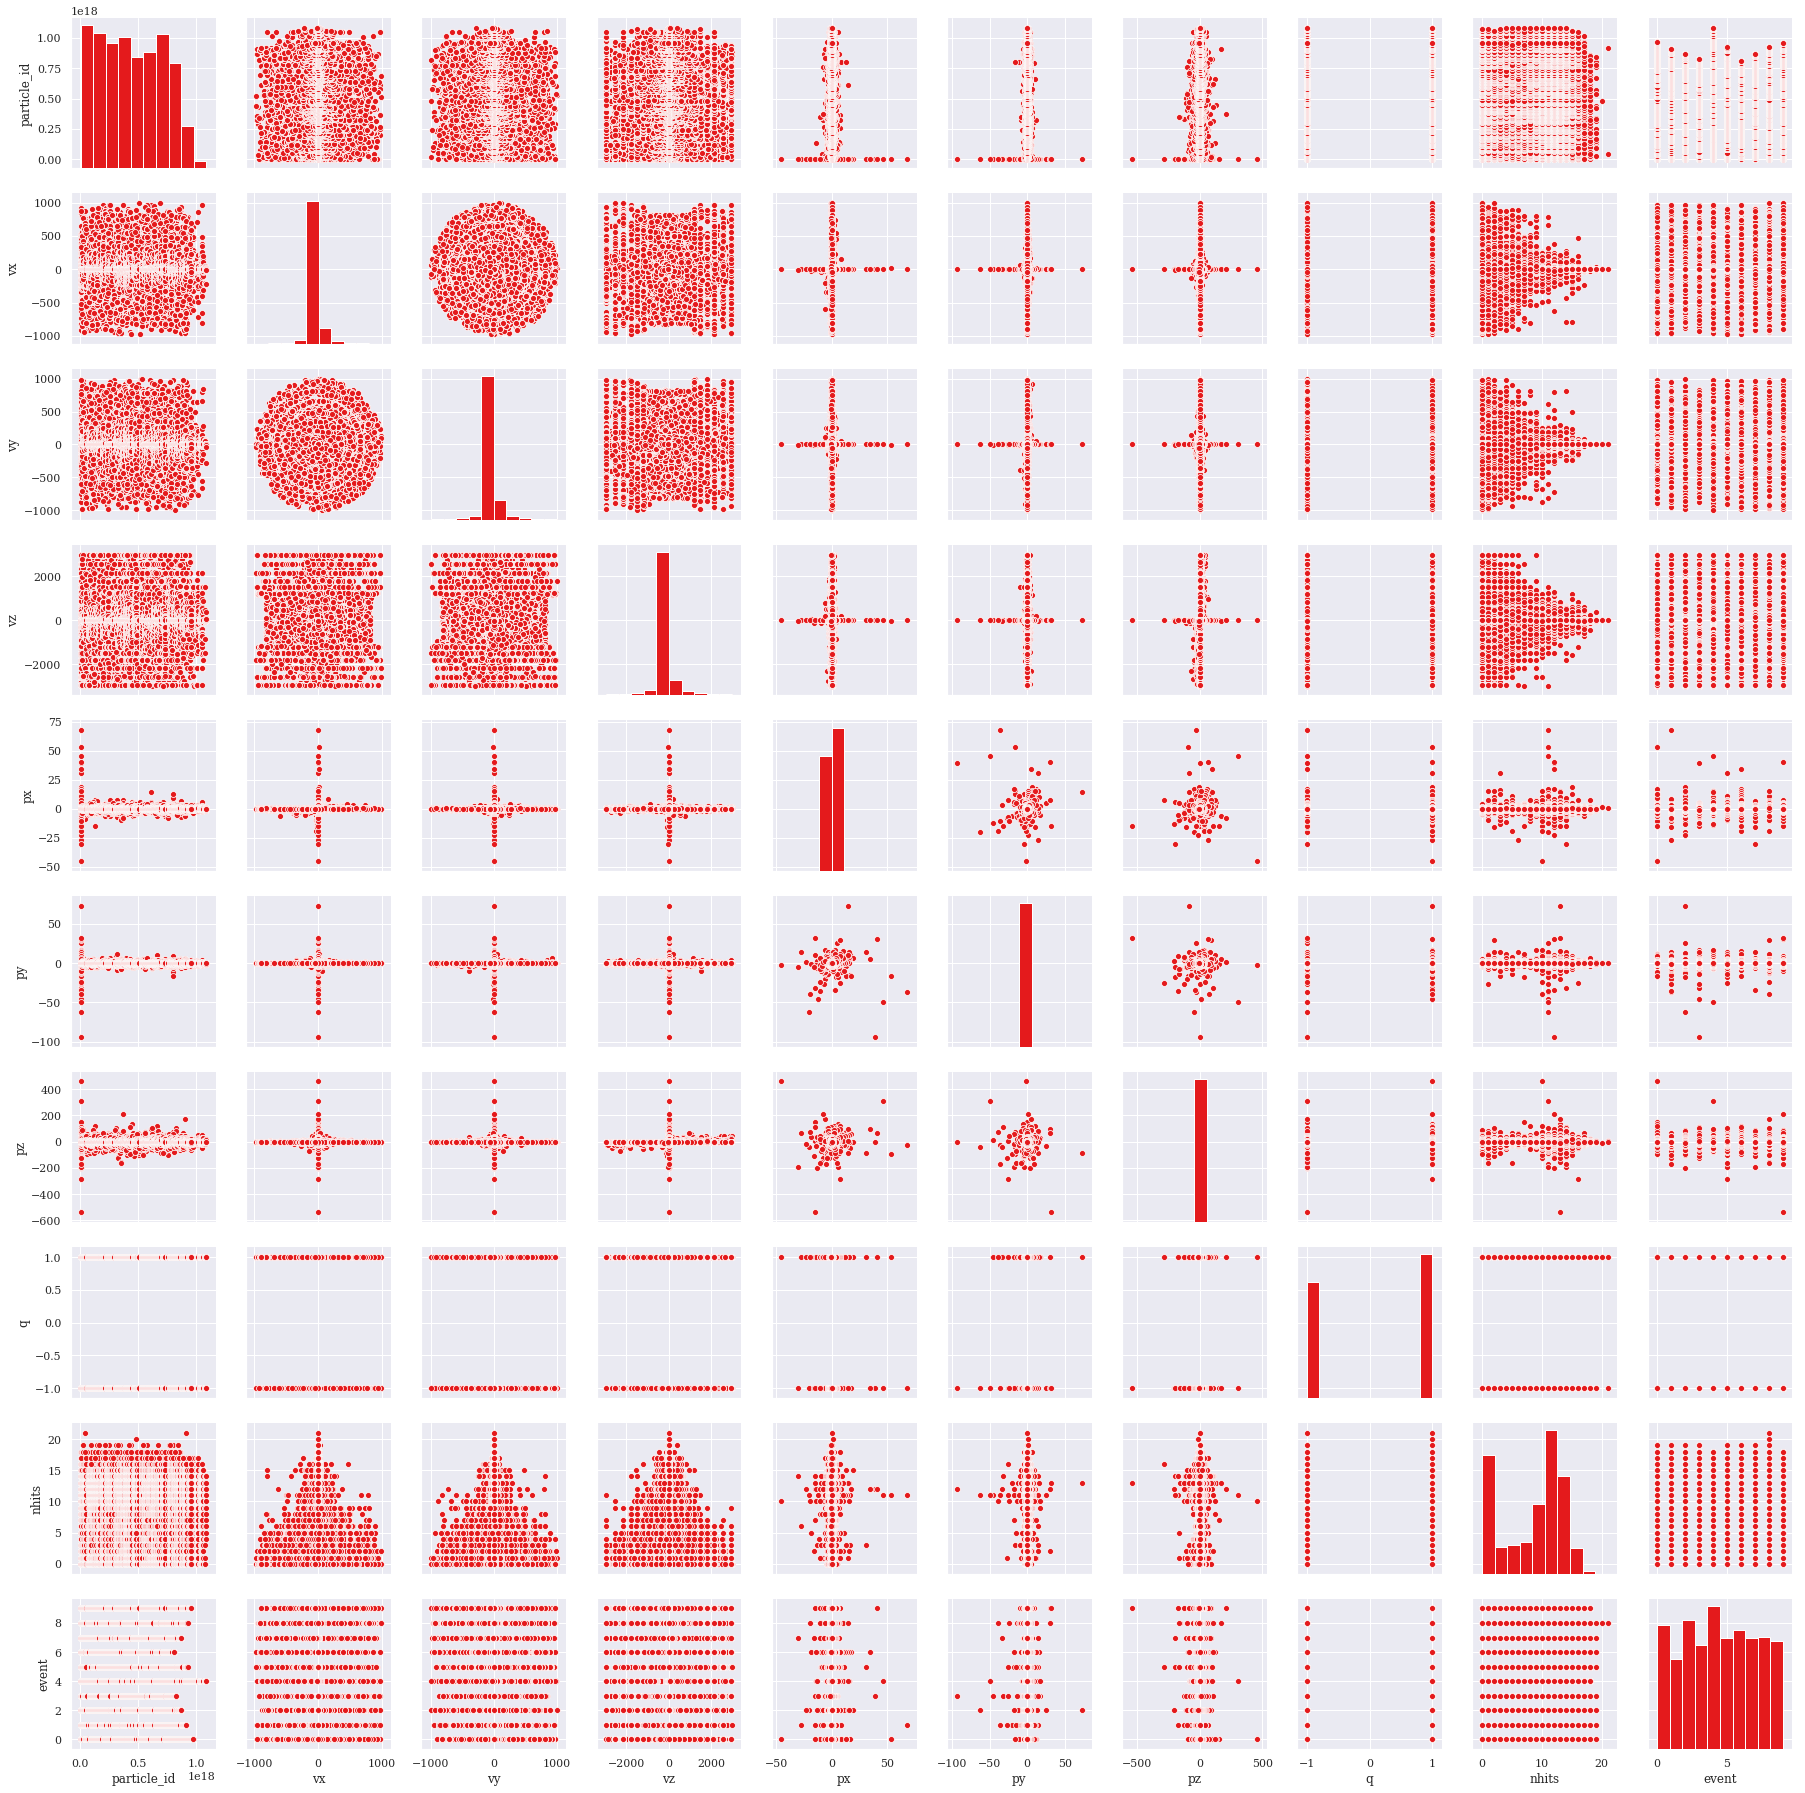

In [23]:
sns.pairplot(particles)

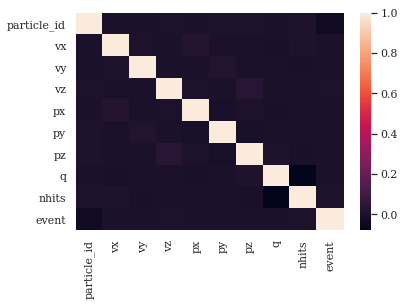

In [24]:
# As seen in the pairplot, there is no linear dependence on any variable therefore, results for any regression cant be done.
# In order to achieve this one can obtain the correlation coefficients:
# There is no correlation with any variable. 
sns.heatmap(particles.corr())

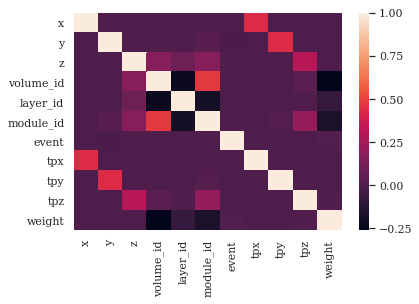

In [25]:
# We can obtain a heatmap to see the relations
sns.heatmap(general_particle_info[['x','y', 'z', 'volume_id', 'layer_id', 'module_id', 'event', 'tpx', 'tpy', 'tpz', 'weight']].corr())

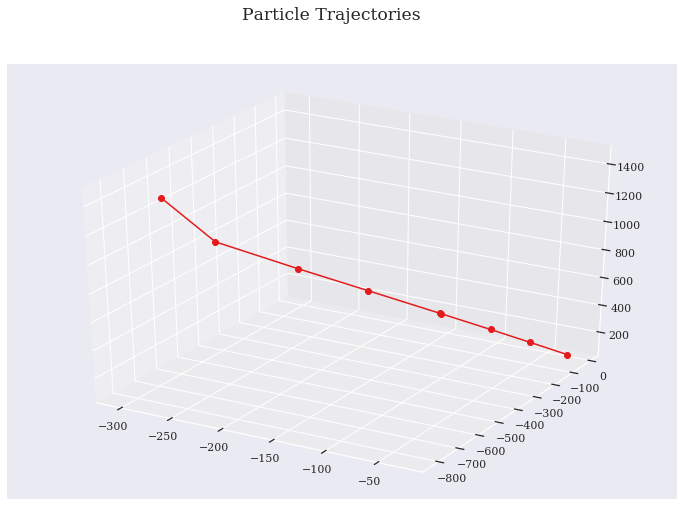

In [26]:
track = general_particle_info[general_particle_info['particle_id'] == general_particle_info[general_particle_info['particle_id']!=0]['particle_id'].value_counts().index[0]]
track
track2 = track[track.event==0]
fig = plt.figure(figsize=(12,8))
st = fig.suptitle("Particle Trajectories", fontsize="x-large")
ax = fig.gca(projection='3d')
ax.plot(track2.x, track2.y, track2.z, marker='o')